Create three data sets with bias and domain shift, using the datagen module.

In [1]:
from datagen.datagen import make_moons_triplet

xs,ys,xg,yg,xt,yt = make_moons_triplet(force_balance=True)

Visualization them, using modified code taken from https://adapt-python.github.io/adapt/examples/Two_moons.html

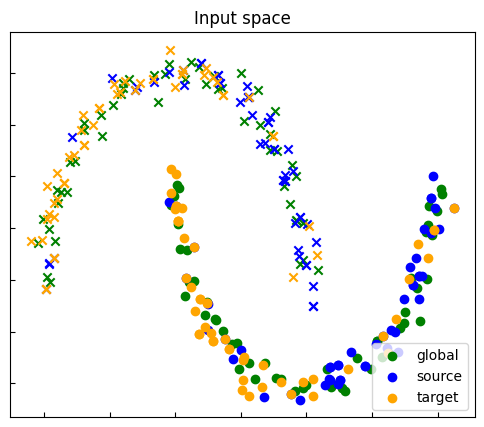

In [2]:
from datagen.visualize import visualize_shift2d

visualize_shift2d(xs,ys,xg,yg,xt,yt)

Verify that force_balance worked

In [3]:
import numpy as np

global_ratio = np.mean(yg)
source_ratio = np.mean(ys)
target_ratio = np.mean(yt)

print(f"Global: {global_ratio}, Source: {source_ratio}, Target: {target_ratio}")

Global: 0.5, Source: 0.5, Target: 0.5


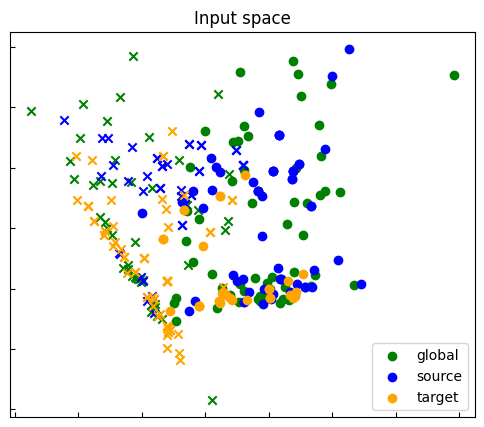

Global: 0.55, Source: 0.57, Target: 0.31


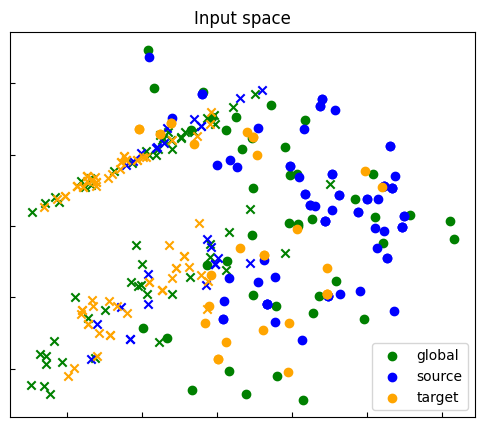

Global: 0.42, Source: 0.73, Target: 0.3


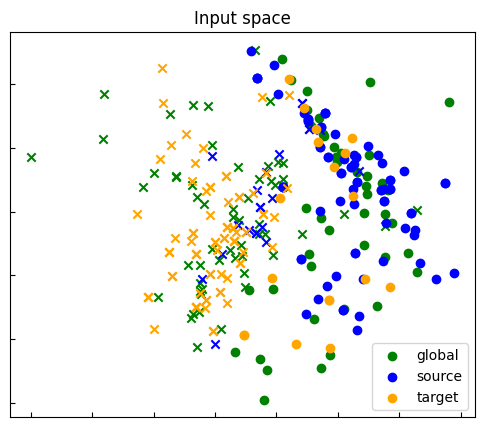

Global: 0.44, Source: 0.78, Target: 0.18


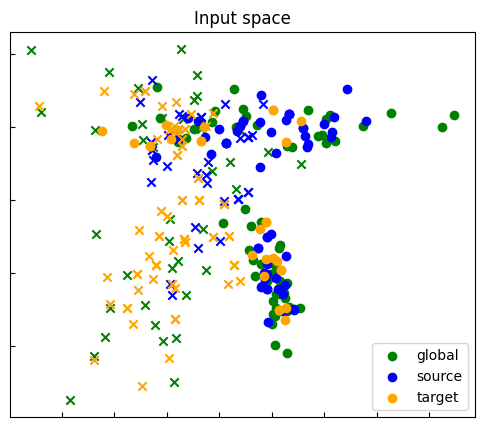

Global: 0.61, Source: 0.63, Target: 0.3


In [4]:
from datagen.selector import  Selector
from datagen.builder import  DatasetBuilder

init_classification = {
    'n_samples' : 500,
    'n_features' : 2,
    'n_informative' : 2,
    'n_repeated' : 0,
    'n_redundant' : 0
}

selector = Selector(100, 100, 100, 1, 1, 2)
builder = DatasetBuilder(init_classification, selector)
runs = 4
for _ in range(runs):
    xs, ys, xg, yg, xt, yt = builder.generate()
    visualize_shift2d(xs,ys,xg,yg,xt,yt)
    print(f"Global: {np.mean(yg)}, Source: {np.mean(ys)}, Target: {np.mean(yt)}")